<a href="https://colab.research.google.com/github/seoyeon7/ML/blob/main/Linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import math
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv('/content/iris.data',header=None, names=['sepal_len','sepal_width','petal_len','petal_width','class'])

In [24]:
index=data[['sepal_len','sepal_width','petal_len','petal_width']]
target = data['class']

In [25]:
data = data.sample(frac=1).reset_index(drop=True)

In [26]:
def split(dataset):
    train_size = int(data.shape[0]*0.80)
    test_size = int(data.shape[0]*0.20)
    
    traindata = dataset.iloc[test_size:].reset_index(drop=True)
    testdata = dataset.iloc[:test_size].reset_index(drop=True)
    return traindata,testdata

train = split(data)[0]
test = split(data)[1]

In [27]:
train.head

<bound method NDFrame.head of      sepal_len  sepal_width  petal_len  petal_width            class
0          6.2          2.2        4.5          1.5  Iris-versicolor
1          6.1          2.8        4.0          1.3  Iris-versicolor
2          5.1          3.8        1.9          0.4      Iris-setosa
3          6.7          3.0        5.0          1.7  Iris-versicolor
4          4.5          2.3        1.3          0.3      Iris-setosa
..         ...          ...        ...          ...              ...
115        5.7          2.6        3.5          1.0  Iris-versicolor
116        6.4          2.7        5.3          1.9   Iris-virginica
117        6.5          3.0        5.5          1.8   Iris-virginica
118        5.9          3.2        4.8          1.8  Iris-versicolor
119        5.0          3.3        1.4          0.2      Iris-setosa

[120 rows x 5 columns]>

<function matplotlib.pyplot.show>

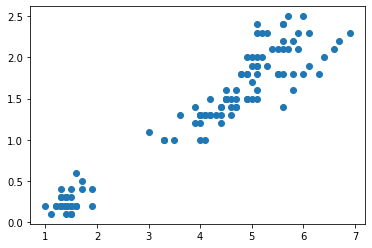

In [28]:
#4개의 feature 중 petal_len, petal_width 사용

p_len=np.array(train['petal_len'])
p_width=np.array(train['petal_width'])
plt.scatter(p_len,p_width)
plt.show

In [29]:
def Cost(X,y,a,b):
    return sum((X*a+b-y)**2)/2/len(y)

In [30]:
print(Cost(p_len,p_width,1,10))

80.28633333333332


In [31]:
def Grad_a(X,y,a,b):
    return sum((a*X+b-y)*X)/len(y)
def Grad_b(X,y,a,b):
    return sum(a*X+b)/len(y)

In [33]:
def Train(X,y,n,LearningRate):
    a,b=0,0
    for _ in range(n):
        g_a=Grad_a(X,y,a,b)
        g_b=Grad_b(X,y,a,b)
        a-=LearningRate*g_a
        b-=LearningRate*g_b
    return [a,b]

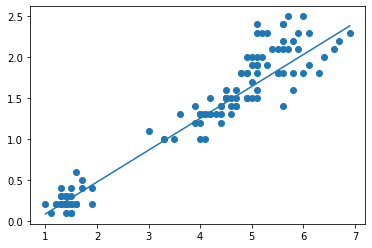

In [47]:
a,b=Train(p_len,p_width,1000,0.0003)
plt.scatter(p_len,p_width)
plt.plot([min(p_len),max(p_len)],np.array([min(p_len),max(p_len)])*a+b)
plt.show()